In [1]:
import warnings
warnings.simplefilter('ignore')

# Modelagem de Séries Temporais com Python

## PyData-SP — fevereiro/2017

### Wilson Freitas



## Wilson Freitas

- físico
- trabalha no mercado financeiro com modelagem quantitativa
- corredor
- padeiro


## Agenda

- Ferramentas em Python para Séries Temporais
- Séries Temporais
- Processos Estocásticos Lineares Estacionários
- Modelos de Volatilidade


## Ferramentas em Python para Séries Temporais

### `statsmodels`

- Linear regression models
- Generalized linear models
- Discrete choice models
- Robust linear models
- Many models and functions for time series analysis
- Nonparametric estimators
- A collection of datasets for examples
- A wide range of statistical tests
- Input-output tools for producing tables in a number of formats (Text, LaTex, HTML) and for reading Stata files into NumPy and Pandas.
- Plotting functions
- Extensive unit tests to ensure correctness of results

fonte: http://statsmodels.sourceforge.net/


## Ferramentas em Python para Séries Temporais

### `arch`

The ARCH toolbox currently contains routines for

- Univariate volatility models
- Bootstrapping
- Multiple comparison procedures
- Unit root tests

fonte: http://arch.readthedocs.io/en/latest/

## Séries Temporais

- O que são Séries Temporais?

<div style="font-size: 150%; text-align: center; margin-top: 15px; margin-bottom: 15px;">
Qualquer conjunto de dados ordenados no tempo
</div>

- Objetivo
    - Estudar a dinâmica das grandezas

- Área abrangente que envolve:
    - processos estocásticos lineares estacionários
    - processos não lineares
    - processos com heterocedasticidade condicional—Modelos de Volatilidade
    - processos multivariados

- Exemplos:
    - preços de ações na Bolsa de Valores
    - dados de tráfego do estado de São Paulo
    - registro de temperatura
    - Dados de GPS: posição, frequência cardíaca

## Séries Temporais

<br>

<div style="font-size: 150%">
$$
{x_t, t \in \mathbb{Z}}
$$
</div>

<br>

### Objetivo da modelagem de Séries Temporais

Obter uma função $f$ tal que

<div style="font-size: 150%">
$$
x_t = f(x_s\, \mathrm{para\, qualquer} \, s < t)
$$
</div>

Queremos explicar o futuro conheçendo o passado, em média, mas não precisa ser na mesma variável.

# Processos Lineares Estacionários

## Carregando os pacotes

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 8.0)
import statsmodels.api as sm
import statsmodels.tsa as tsa

## Estacionariedade

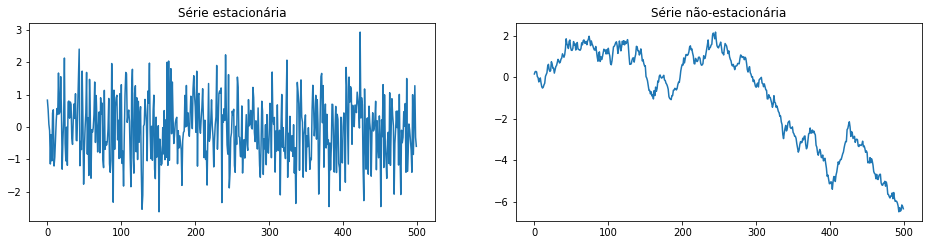

In [3]:
x = np.random.randn(500)
plt.figure(figsize=(16,8))
plt.subplot(221)
plt.plot(x)
plt.title('Série estacionária')
plt.subplot(222)
plt.plot(np.cumsum(x * 0.2))
plt.title('Série não-estacionária');

- média *constante*
- variância *constante*
- auto-covariância *independente do tempo*


## Processos Autoregressivos — AR(p)

<br>

$$
x_t - \mu = \phi_1 (x_{t-1} - \mu) + ... + \phi_p (x_{t-p} - \mu) + e_t
$$

## Simulando processo AR(1) com `statsmodels`

<br>

$$
x_t = 0.75 x_{t-1} + e_t
$$

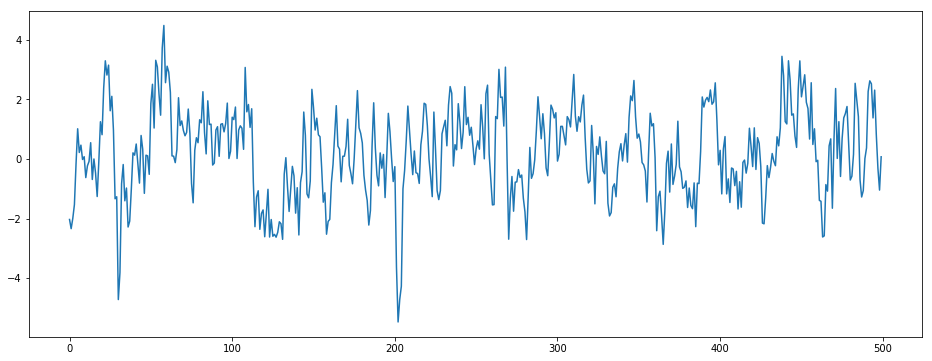

In [18]:
ar1 = tsa.arima_process.ArmaProcess([1, -0.75], [1])
rs_ar1 = ar1.generate_sample(500)
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)
ax.plot(rs_ar1);

## Análise das funções de Autocorrelação (`acf`) e Autocorrelação Parcial (`pacf`)

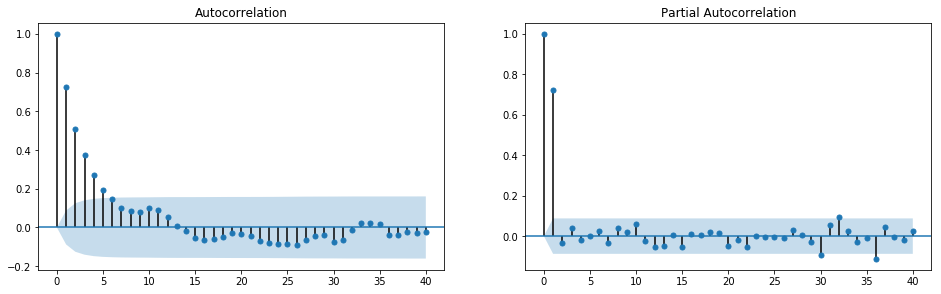

In [19]:
def acf_pacf(x):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(x, lags=40, ax=ax1)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(x, lags=40, ax=ax2)
acf_pacf(rs_ar1)

- função de autocorrelação decai lentamente
- função de autocorrelação parcial apresenta *lag* significativo da ordem do processo

## Simulando processo AR(2) com `statsmodels` — `acf` e `pacf`

$$
x_t = 0.75 x_{t-1} - 0.5 x_{t-2} + e_t
$$

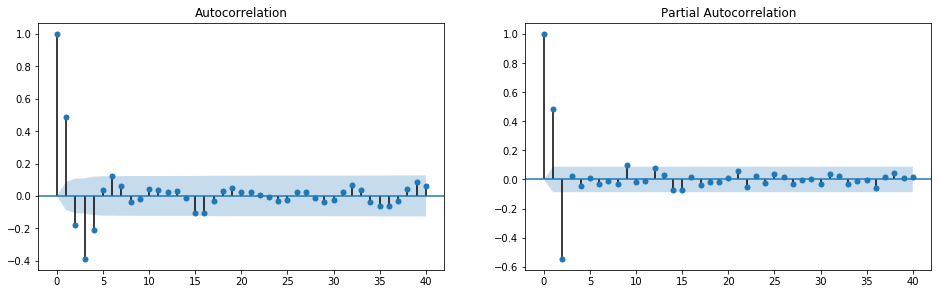

In [20]:
ar2 = tsa.arima_process.ArmaProcess([1, -0.75, 0.5], [1])
rs_ar2 = ar2.generate_sample(500)
acf_pacf(rs_ar2)

- função de autocorrelação decai lentamente com inversão de sinal, 
- função de autocorrelação parcial apresenta *lags* significativos da ordem do processo, *lags* 1 e 2

## Processos de Média Móvel — MA(q)

<br>

$$
x_t = \mu + e_t - \theta_1 e_{t-1} - ... - \theta_q x_{t-q}
$$

## Simulando processo MA(1) com `statsmodels`

<br>

$$
x_t = e_t - 0.75 e_{t-1}
$$

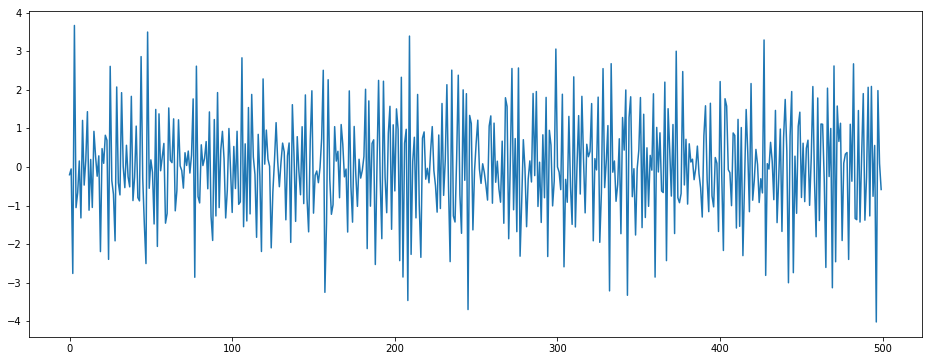

In [22]:
ma1 = tsa.arima_process.ArmaProcess([1], [1, -0.75])
rs_ma1 = ma1.generate_sample(500)
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)
ax.plot(rs_ma1);

## `acf` e `pacf`

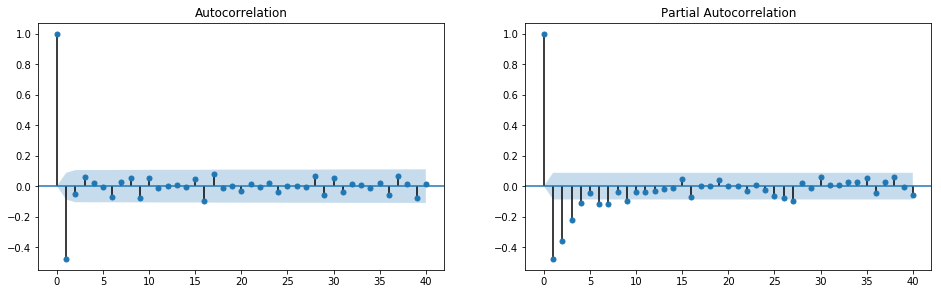

In [23]:
acf_pacf(rs_ma1)

- função de autocorrelação apresenta *lags* significativos da ordem do processo
- função de autocorrelação parcial decai lentamente com inversão de sinal

## Processos Autoregressivos e de Médias Móveis

Juntando os processos Autoregressivos AR(p) e os de Médias Móveis MA(q) obtemos os processos ARMA(p,q).

<br>

$$
x_t = c + \phi_1 x_{t-1} + ... + \phi_p x_{t-p} + e_t + \theta_1 e_{t-1} + ... + \theta_q e_{t-q}
$$

## Análise de Séries Reais

Série da cotação do Dólar Americano em Reais

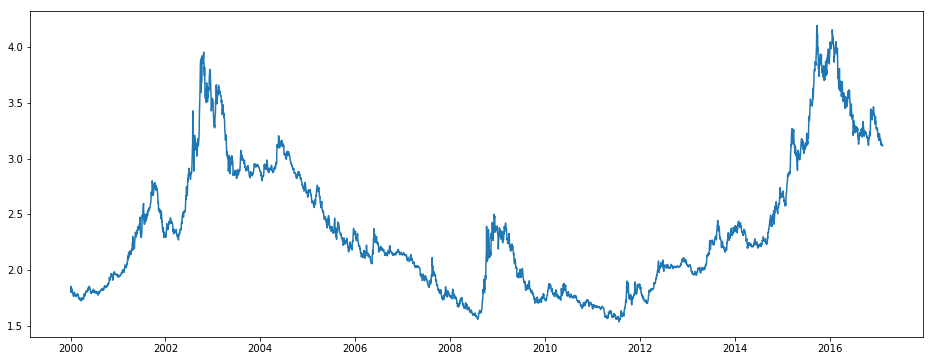

In [9]:
import quandl
df = quandl.get('BCB/1', start_date = '2000-01-01')
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)
ax.plot(df);

## `acf`  e `pacf` da série de Dólar Americano em Reais

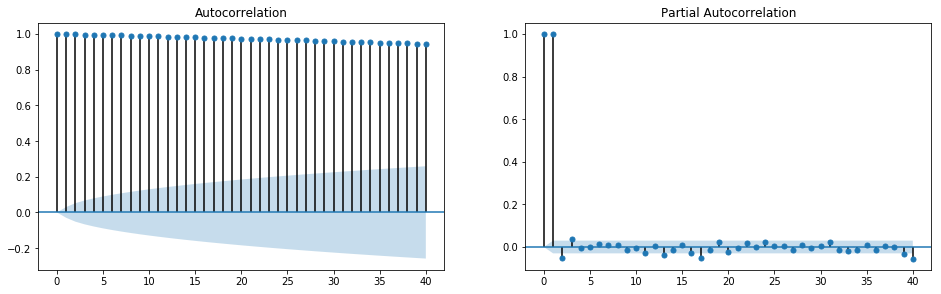

In [10]:
acf_pacf(df)

## Análise da série de retornos do Dólar Americano em Reais

Retornos logarítimicos de séries de preço.

$$
r_t = \log \left( \frac{x_t}{x_{t-1}} \right)
$$

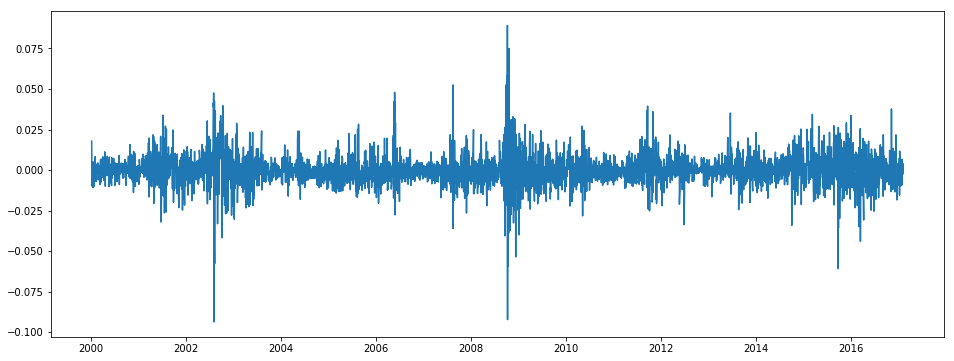

In [11]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)
ax.plot(np.log(df).diff().dropna());

## `acf`  e `pacf` da série de retornos do Dólar Americano em Reais

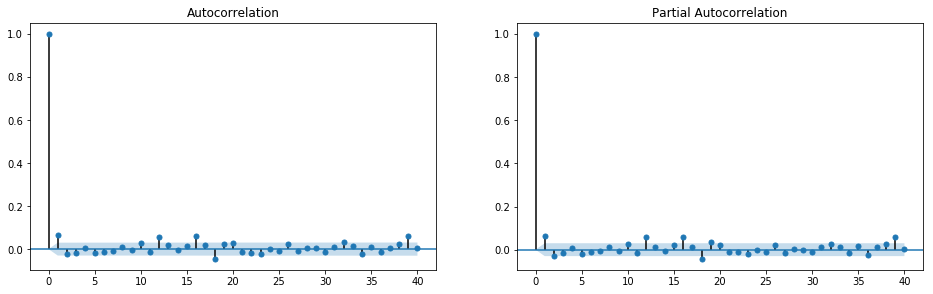

In [12]:
acf_pacf(np.log(df).diff().dropna())

## `acf`  e `pacf` da série de retornos quadráticos do Dólar Americano em Reais

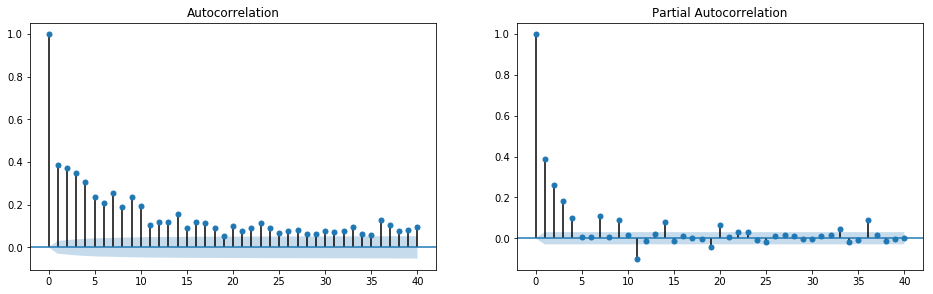

In [13]:
acf_pacf(np.log(df).diff().dropna() ** 2)

Os retornos quadráticos apresentam tanto características de AR(p) como de MA(q), caracterizando um processo ARMA(p,q).

In [14]:
model = sm.tsa.ARMA(1000 * (np.log(df).diff().dropna() ** 2), (1,1)).fit()
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                  Value   No. Observations:                 4301
Model:                     ARMA(1, 1)   Log Likelihood                -688.706
Method:                       css-mle   S.D. of innovations              0.284
Date:                Sun, 12 Feb 2017   AIC                           1385.411
Time:                        23:03:35   BIC                           1410.878
Sample:                    01-04-2000   HQIC                          1394.405
                         - 02-10-2017                                         
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           0.0942      0.015      6.078      0.000         0.064     0.125
ar.L1.Value     0.9097      0.010     87.461      0.000         0.889     0.930
ma.L1.Value    -0.6763      0.018    -36.629    

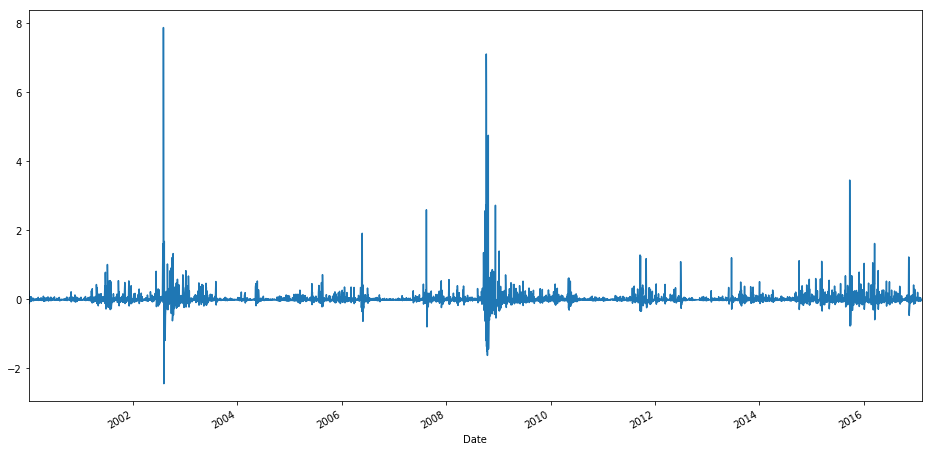

In [15]:
model.resid.plot();

# Modelos de Volatilidade

## Modelos de Volatilidade

- O fato dos retornos quadráticos seguirem um ARMA(p,q) indica que a volatilidade dos retornos possui um processo.
- Por isso temos os modelos da família GARCH(p,q)

<br>
<div style="font-size: 150%">
$$
x_t = \mu + e_t
$$
</div>

onde

<br>

<div style="font-size: 150%">
$$
\begin{align}
e_t & = z_t \sigma_t \\
\sigma^2_t & = \omega + \alpha_1 e^2_{t-1} + ... + \alpha_p e^2_{t-p} + \beta_1 \sigma^2_{t-1} + ... + \beta_q \sigma^2_{t-q}
\end{align}
$$
</div>

$z_t$ é variável aleatória *i.i.d.* com uma distribuição especificada a priori.


A variância do processo é um processo autoregressivo.



In [16]:
from arch import arch_model
am = arch_model(np.log(df).diff().dropna() * 100)
res = am.fit(disp = 'off')
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Value   R-squared:                      -0.002
Mean Model:             Constant Mean   Adj. R-squared:                 -0.002
Vol Model:                      GARCH   Log-Likelihood:               -5005.29
Distribution:                  Normal   AIC:                           10018.6
Method:            Maximum Likelihood   BIC:                           10044.0
                                        No. Observations:                 4301
Date:                Sun, Feb 12 2017   Df Residuals:                     4297
Time:                        23:03:39   Df Model:                            4
                                  Mean Model                                  
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
mu            -0.0249  1.002e-02     -2.486  1.292e-

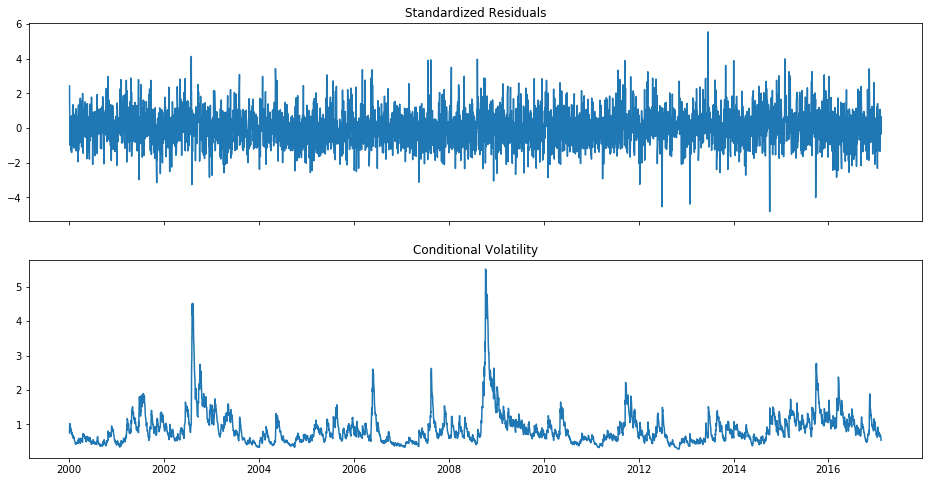

In [17]:
res.plot();

## Túnel de retornos com 99% confiança

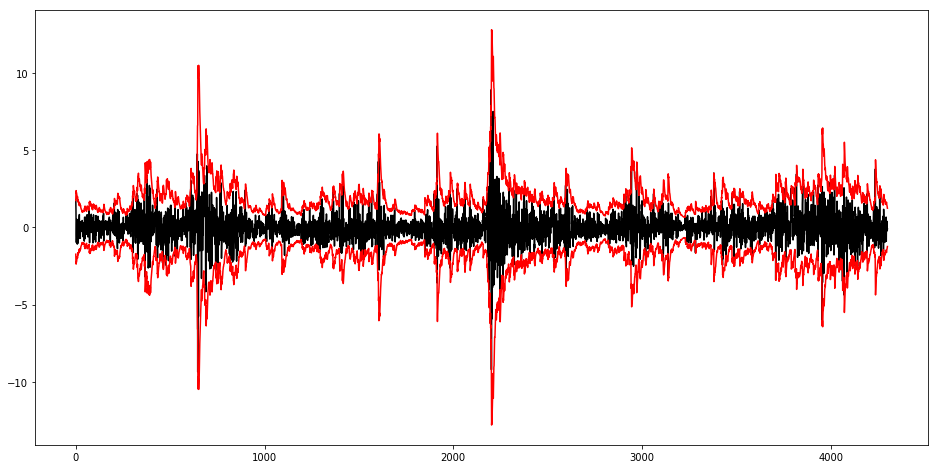

In [51]:
returns = np.log(df).diff().dropna() * 100
plt.plot(returns['Value'].tolist(), '-k')
plt.plot(res._volatility * 2.32, '-r')
plt.plot(- res._volatility * 2.32, '-r');

## Conclusões


Aqui vimos um breve exemplo de como realizar Modelagem de Séries Temporais com Python.

A Modelagem de Séries Temporais é fundamental para a compreensão da **dinâmica** das séries temporais, particularmente utilizada para modelar séries financeiras.

A modelagem de séries temporais financeiras é utilizada para:

- Trading de Índices de Volatilidade
- Gestão de risco
- Apreçamento de derivativos financeiros
- Modelos de Volatilidade em Séries Intradiárias para avaliação de Risco Intradiário
- Modelos de Cointegração para trading de pares (*pairs trading*)
- Modelos de execução de ordens em condições heterogêneas


## Referências

- http://statsmodels.sourceforge.net/stable/
- https://github.com/bashtage/arch
- http://pandas.pydata.org/


# Fim